## UK Transport Dataset - Model Building, Predictive Analysis and Conclusions

- In the initial section of this project, the data was cleaned and preprocessed.

- In this section, I will carry on with cleaning and transforming the data. After which predictive learning models will be fit to the data to make predictions.

## Table of Contents

1. Importing Libraries
2. Business Objective and Context
3. Data Loading and Selection
4. Data Cleaning and Transformation
5. Model Building
6. Model Evaluation
7. Conclusion and Discussion of Results
8. Recommendations
9. Possible Future Improvements and Business Scenarios for Model Implementation in real-world

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import warnings

import io

import time


"""
importing visualization modules

"""

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
 AdaBoostClassifier,
 GradientBoostingClassifier,
 RandomForestClassifier,
 BaggingClassifier,
)
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
 f1_score,
 accuracy_score,
 recall_score,
 precision_score,
 confusion_matrix,
 plot_confusion_matrix,
)
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Starting the Notebook Timer

In [2]:
Start_time = time.time()

def notebook_timer(xl):
    
    def wrapper (*args, **kwargs):
        
        start_time = time.time()
        
        result = fn(*args,**kwargs)
        
        end_time = time.time()
        
        time_taken = round(end_time - start_time, 4)
        
        if time_taken < 60:
            
            print(f'{fn.__name__} took {time_taken} seconds to run')

        else :

            print(f'{fn.__name__} took {time_taken/60} minutes to run')

        return result

    return wrapper

## 2.0 Business Objective

### Our business is a consultancy service that focuses on analysing past accident and casualty data to identify the danger zones in a city with regard to vehicular accidents. The goal of this analysis is to come up with preventive measures that can mitigate the loss of human lives and property damage. 


### To provide this service, we analyse reliable and up-to-date data on past accidents and casualties in the city to patterns and trends, such as the locations where accidents are most likely to occur, and the factors that contribute to these accidents.


### Once the danger zones have been identified, we come up with preventive measures and strategies that can help reduce the risk of accidents in these areas.


### Overall, the goal of this consultancy business is to help city authorities and other stakeholders reduce the number of accidents and casualties caused by vehicular accidents in the city.

## 3.0 Data Loading and Selection

- In the exploration and cleaning section, 4 datasets were created representing our xtrain, xtest, ytrain, and ytest datasets. x_train and x_test contain our independent variables, while y_train and y_test have the dependent variable.

### 3.1 Data Loading 

In [3]:
# Load all four datasets 
x_train = pd.read_csv(r"C:\Users\iremo\OneDrive - Aston University\Big Data\Group Code\Data 2\x_train.csv")
x_test = pd.read_csv(r"C:\Users\iremo\OneDrive - Aston University\Big Data\Group Code\Data 2\x_test.csv")
y_train = pd.read_csv(r"C:\Users\iremo\OneDrive - Aston University\Big Data\Group Code\Data 2\y_train.csv")
y_test = pd.read_csv(r"C:\Users\iremo\OneDrive - Aston University\Big Data\Group Code\Data 2\y_test.csv")


In [4]:
### Previewing each data set

print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(9903, 31)
(9903, 2)
(4270, 31)
(4270, 2)


- The shape of the x_train dataset is 9903 rows and 31 columns.
- The shape of the y_train dataset is 9903 rows and 2 columns.
- The shape of the x_test dataset is 4270 rows and 31 columns.
- The shape of the y_test dataset is 4270 rows and 2 columns.


In [5]:
# Fully view all the columns in the Dataset

pd.set_option('display.max_columns', None)

In [6]:
x_train.head()

,Unnamed: 0,accident_year_x,longitude,latitude,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_driver,age_of_vehicle,numeric_fraction,Month
0,3082,2014,-2.970,53.402,1,1,6,6,30.000,6,4,1,1,2,0,1,1,2,E01006514,9,18,0,0,0,0,1,2,19.000,11.000,13.667,1
1,8906,2017,-2.859,53.381,2,1,4,6,30.000,0,0,1,1,1,0,1,1,2,E01006793,9,18,0,0,0,0,1,3,40.267,6.576,8.167,3
2,6485,2015,-2.990,53.407,2,2,5,2,30.000,3,0,4,2,2,0,1,1,2,E01033752,8,18,0,0,0,0,4,1,41.000,7.000,7.417,12
3,723,2013,-2.946,53.408,2,1,3,3,30.000,0,0,1,1,1,0,1,1,2,E01033763,19,12,0,0,0,0,3,1,53.000,8.000,15.767,6
4,1910,2013,-2.894,53.396,1,1,2,6,30.000,0,0,1,1,1,0,1,1,2,E01006579,9,1,0,0,0,0,2,2,42.000,10.000,13.500,4


In [7]:
y_train.head()

,Unnamed: 0,accident_severity
0,3082,3
1,8906,3
2,6485,3
3,723,3
4,1910,3


In [8]:
x_test.head()

,Unnamed: 0,accident_year_x,longitude,latitude,number_of_vehicles,number_of_casualties,day_of_week,road_type,speed_limit,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_type,vehicle_manoeuvre,vehicle_location_restricted_lane,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_driver,age_of_vehicle,numeric_fraction,Month
0,10573,2018,-2.994,53.406,2,1,7,3,30.000,3,5,1,1,1,0,1,1,2,E01033752,9,7,0,0,0,0,4,1,31.000,6.562,20.583,4
1,9746,2017,-2.897,53.397,2,1,6,1,40.000,1,0,4,1,1,0,1,2,2,E01006582,5,18,0,0,0,0,0,1,50.000,6.562,2.917,10
2,4461,2014,-2.901,53.363,2,1,4,1,30.000,1,0,1,1,1,0,1,1,2,E01006686,9,18,0,0,0,0,1,2,31.000,3.000,20.333,8
3,2736,2014,-2.972,53.436,1,1,6,6,30.000,0,0,4,1,1,0,1,1,2,E01006703,8,18,0,0,0,0,3,1,49.000,6.000,21.017,11
4,7609,2016,-2.933,53.406,2,4,6,6,30.000,3,0,1,1,1,0,1,1,2,E01006690,8,9,0,0,0,0,1,1,31.000,11.000,19.083,7


In [9]:
y_test.head()

,Unnamed: 0,accident_severity
0,10573,3
1,9746,3
2,4461,3
3,2736,2
4,7609,3


### Drop the Unnamed column in both train and test datasets

In [10]:
y_train = y_train.drop("Unnamed: 0",axis=1) 
x_train = x_train.drop("Unnamed: 0",axis=1)

In [11]:
y_test = y_test.drop("Unnamed: 0",axis=1) 
x_test = x_test.drop("Unnamed: 0",axis=1)

In [12]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(9903, 30)
(9903, 1)
(4270, 30)
(4270, 1)


- After dropping the columns, it is ensured that the shape of the x_train and y_train datasets match.


- Also, the x_test and y_test datasets shape match

### Checking correlations between the variables in the training dataset

In [13]:
# merging x_train and y_train to check correlations between the dependent and independent variables
X = x_train.merge(y_train,left_index=True, right_index=True)

In [14]:
corr_nos = X.corr(method='pearson')
corr_nos['accident_severity'].sort_values(ascending=False)

accident_severity                              1.000
did_police_officer_attend_scene_of_accident    0.124
number_of_vehicles                             0.078
sex_of_driver                                  0.045
first_point_of_impact                          0.042
vehicle_type                                   0.027
speed_limit                                    0.022
junction_detail                                0.021
road_surface_conditions                        0.019
weather_conditions                             0.019
number_of_casualties                           0.007
day_of_week                                    0.000
special_conditions_at_site                    -0.000
hit_object_in_carriageway                     -0.002
longitude                                     -0.003
age_of_driver                                 -0.005
vehicle_location_restricted_lane              -0.006
pedestrian_crossing_physical_facilities       -0.007
trunk_road_flag                               

- After exploring the correlations between accident_severity and the independent variables, 'did_police_officer_attend_scene_of_accident', 'number_of_vehicles' ,'vehicle_manoeuvre', and 'light_conditions' are the variables which have relatively high correlations with the result of the accident_severity class.


- It should be noted, that majority of the variables have weak correlations with the target variable.

### Plotting the Correlations on a Heatmap

<AxesSubplot:>

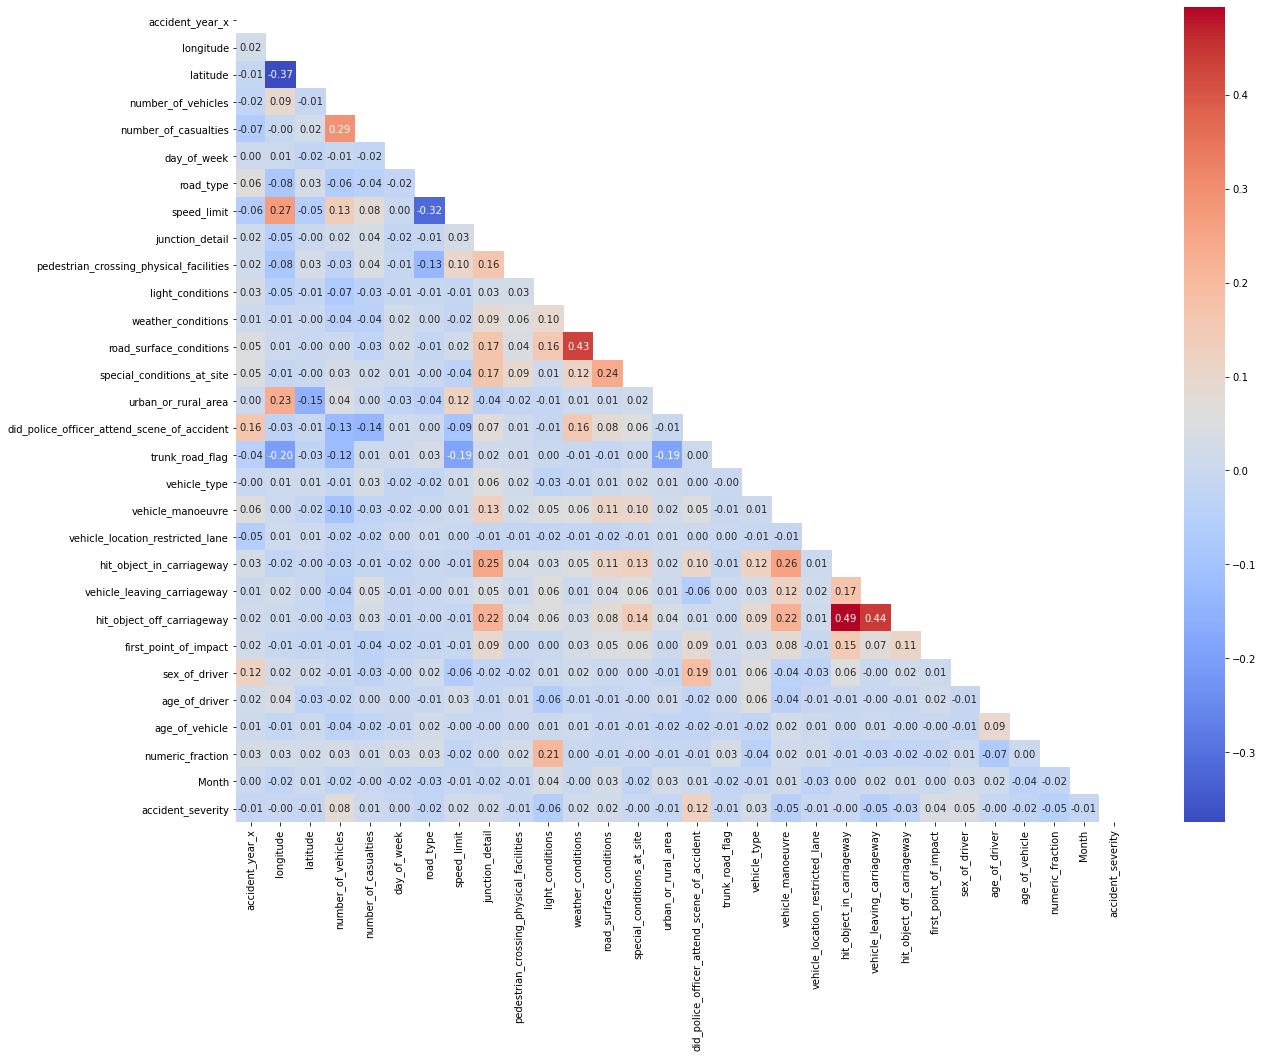

In [15]:
plt.figure(figsize=(20,15))
matrix2 = np.triu(corr_nos)
sns.heatmap(corr_nos, annot=True, cmap= 'coolwarm', fmt= '.2f', mask = matrix2)

- In line with the pearson correlations calculated earlier, accident_severity does not have a lot of strong correlations with the independent variables.

- However, 'did_police_officer_attend_scene_of_accident', 'number_of_vehicles' ,'vehicle_manoeuvre', and 'light_conditions' are the most correlated variables.

## 4. Data Cleaning and Transformation

### Feature Encoding

- Creating Dummies to represent categorical variables for both test and train datasets

In [16]:
# get dummy variables for the entire dataframe and drop the first column

x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

In [17]:
### check the shapes of the x_train and x_test dataframes
print (x_train.shape)
print (x_test.shape)

(9903, 337)
(4270, 332)


- After creating dummies, the shape of the x_train dataset is 9903 rows and 337 columns.


- The shape of the x_test dataset is 4270 rows and 332 columns

### Dropping the columns in x_train not in x_test to ensure the shape of the datasets match

In [18]:
# identify columns in df1 that are not present in df2
cols_to_drop = set(x_train.columns) - set(x_test.columns)
cols_to_drop2 = set(x_test.columns) - set(x_train.columns)

# drop the identified columns from df1
x_train = x_train.drop(columns=cols_to_drop)
x_test = x_test.drop(columns=cols_to_drop2)

In [19]:
### check the shapes of the x_train and x_test dataframes
print (x_train.shape)
print (x_test.shape)

(9903, 327)
(4270, 327)


- The shapes of the train and test dataset now match one another

### Transforming numerical variables by standardization

In [20]:
# create a StandardScaler object and fit_transform on the numerical columns
scaler = StandardScaler()

numerical_cols = x_train.select_dtypes(include=['int', 'float']).columns.tolist()

x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.fit_transform(x_test[numerical_cols])


## 5. Model Building

### Creating a validation dataset from our testing dataset

- A validation dataset is created for tuning the model


- The test set is split into 2 equal halves to give the validation dataset.

In [21]:
# creating a 50:50 split
x_val, x_tests, y_val, y_tests = train_test_split(x_test, y_test, test_size=0.5, random_state=2020)

### Building Model Evaluation Functions


- Returning the Accuracy, Recall, Precision and the F1 score of our models

In [22]:
# defining a function to compute different metrics to check performance of a classificat
def model_performance_classification_sklearn(model, predictors, target):
     """
     Function to compute different metrics to check classification model performance
     model: classifier
     predictors: independent variables
     target: dependent variable
     """
     # predicting using the independent variables
     pred = model.predict(predictors)
     accuracy = accuracy_score(target, pred) # to compute Accuracy
     recall = recall_score(target, pred,average='weighted') # to compute Recall
     precision = precision_score(target, pred,average='weighted') # to compute Precision
     f1 = f1_score(target, pred,average='weighted') # to compute F1-score
     # creating a dataframe of metrics
     df_perf = pd.DataFrame(
     {
     "Accuracy": accuracy,
     "Recall": recall,
     "Precision": precision,
     "F1": f1,
     },
     index=[0],
     )
     return df_perf

### Creating an Oversampled and Undersampled Dataset

- Due to the class imbalance, oversampling is used to address the issue of imbalanced class distribution in a dataset by creating synthetic samples of the minority class to balance it with the majority class

In [23]:
# create oversampled training dataset

# Create an instance of RandomUnderSampler with sampling_strategy parameter set to 'all'
over_rus = RandomOverSampler(sampling_strategy={1:800,2:3000,3:8181})

# Fit the sampler on the dataset
x_train_oversampled, y_train_oversampled = over_rus.fit_resample(x_train, y_train)

In [24]:
# Create an instance of RandomUnderSampler with sampling_strategy parameter set to 'all'
rus = RandomUnderSampler(sampling_strategy={1:69,2:150,3:300})

# Fit the sampler on the dataset
x_train_undersampled, y_train_undersampled = rus.fit_resample(x_train, y_train)


### Barchart Function

In [25]:
def barchart(dataframe,col_name,y_label,x_label,perc=False):

    """
    Plot the frequencies of the 'Private' categorical variable

    """
    plt.figure(figsize=(15, 9))
    
    total = len(dataframe[col_name]) 
    

    ax = sns.countplot(
            data=dataframe,
            x=col_name,
            palette="Paired"
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    ax.tick_params(bottom=False, left=False)

    ax.set_axisbelow(True)

    ax.yaxis.grid(True, color='#EEEEEE')

    ax.xaxis.grid(False)


    ax.set_ylabel(y_label,fontsize=20)
    ax.set_xlabel(x_label,fontsize=20)
    
    #ax.set_ylim(0,600)
    
    plt.ticklabel_format(style='plain', axis='y')
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
            
            if (100 * p.get_height() / total) > 0.5:
        
                x = p.get_x() + p.get_width() / 2  # width of the plot
                y = p.get_height()  # height of the plot

                ax.annotate(
                    label,
                    (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points",
                )  # annotate the percentage
                
            else:
                pass
        
        else:
            pass
            #label = p.get_height()  # count of each level of the category



    plt.show()  # show the plot
    
    

### Target variable distribution for normal class

In [26]:
y_train.value_counts()

accident_severity
3                    8181
2                    1653
1                      69
dtype: int64

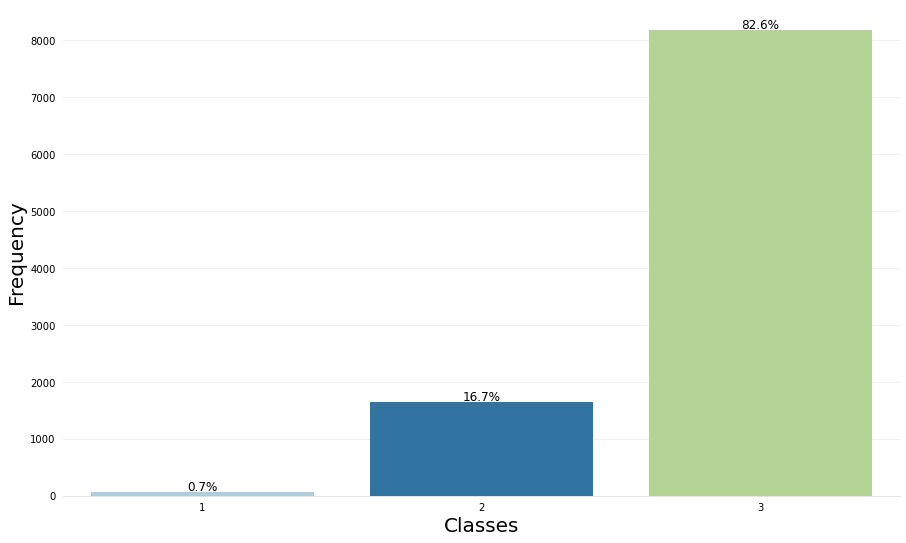

In [27]:
barchart(y_train,'accident_severity','Frequency','Classes',perc=True)

- The original class distribution has 8181 of the 3rd class, 1653 of the 2nd class, and 69 of the 1st class.

### Target variable distribution for oversampled class

In [28]:
y_train_oversampled.value_counts()

accident_severity
3                    8181
2                    3000
1                     800
dtype: int64

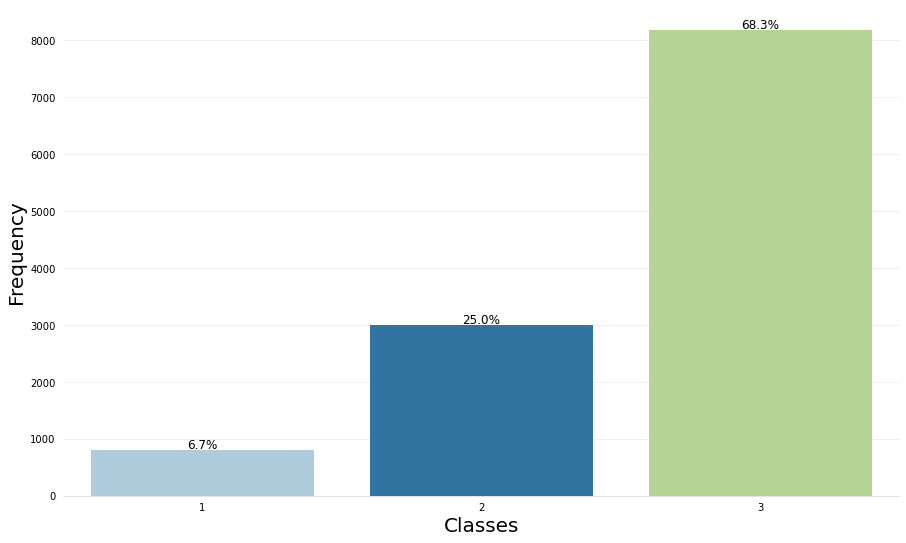

In [29]:
barchart(y_train_oversampled,'accident_severity','Frequency','Classes',perc=True)

- The oversampled class distribution has 8181 of the 3rd class, 3000 of the 2nd class, and 800 of the 1st class.

### Target variable distribution for undersampled class

In [30]:
y_train_undersampled.value_counts()

accident_severity
3                    300
2                    150
1                     69
dtype: int64

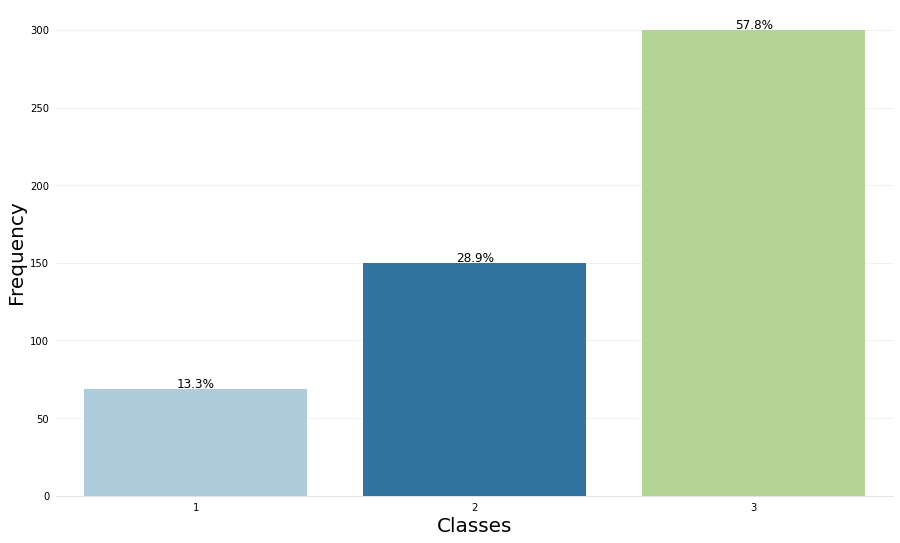

In [31]:
barchart(y_train_undersampled,'accident_severity','Frequency','Classes',perc=True)

- The undersampled class distribution has 300 of the 3rd class, 150 of the 2nd class, and 69 of the 1st class.


- Undersampling can lead to loss of valuable information and potential bias in the resulting model, as it discards samples from the majority class and may not represent the true distribution of the data.

In [32]:
# changing the data type of the target variable

y_train['accident_severity'] = y_train['accident_severity'].astype('category')
y_train_oversampled['accident_severity'] = y_train_oversampled['accident_severity'].astype('category')
y_train_undersampled['accident_severity'] = y_train_undersampled['accident_severity'].astype('category')

### Building Baseline Model

- A logistic Regression is fit as the baseline model

In [33]:
# Creating a logistic regression model
logreg = LogisticRegression()

# Training the model
logreg.fit(x_train_oversampled, y_train_oversampled)

# Predicting the test set results
y_pred = logreg.predict(x_train_oversampled)


### Evaluating Base Model

### Model Evaluation Function

In [34]:
# defining a function to compute different metrics to check performance of a classificat
def model_performance_classification_sklearn(model, predictors, target):
     """
     Function to compute different metrics to check classification model performance
     model: classifier
     predictors: independent variables
     target: dependent variable
     """
     # predicting using the independent variables
     pred = model.predict(predictors)
     acc = accuracy_score(target, pred) # to compute Accuracy
     recall = recall_score(target, pred,average='weighted') # to compute Recall
     precision = precision_score(target, pred,average='weighted') # to compute Precision
     f1 = f1_score(target, pred,average='weighted') # to compute F1-score
     # creating a dataframe of metrics
     df_perf = pd.DataFrame(
     {
     "Accuracy": acc,
     "Recall": recall,
     "Precision": precision,
     "F1": f1,
     },
     index=[0],
     )
     return df_perf

In [35]:
base_model_train = model_performance_classification_sklearn(logreg,x_train_oversampled,y_train_oversampled)
base_model_train

,Accuracy,Recall,Precision,F1
0,0.683,0.683,0.608,0.576


- The baseline model has an accuracy of 68.6% and a recall of 68.6%.


- Precision has a value of 60.7% and an F1 score of 57.2%


- This is low, and this value will try to be inproved further on.

### Confusion Matrix Function for Baseline Model

In [36]:
def base_model_confusion_matrix(x,y):
    
    plt.figure(figsize=(8, 5))

    confusion_matrix_train = confusion_matrix(x, y)

    # Create a heatmap of the confusion matrix
    sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    
    

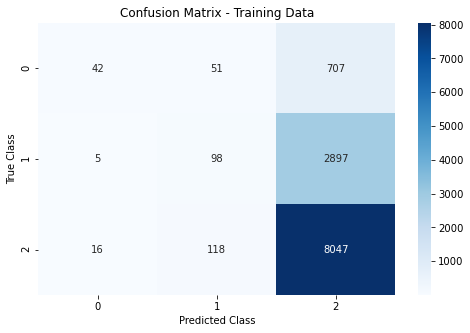

In [37]:
base_model_confusion_matrix(y_train_oversampled,y_pred)

### Base model performance on validation dataset

In [38]:
base_model_val = model_performance_classification_sklearn(logreg,x_val,y_val)
base_model_val

,Accuracy,Recall,Precision,F1
0,0.814,0.814,0.737,0.748


- The model performs well on the validation dataset.

### Model Building

- Models to be used in this task will be:

    
1. Bagging Classifier
2. Random Forest Classifier
3. Gradient Boosting Classifier
4. Adaboost Classifier
5. XGBoost
6. Decision Tree

- This is because accident_severity will be predicted, and it is a categorical variable.


- Hence, this is a classification prediction problem and classification prediction algorithms are picked.

- Accuracy will be used as our scoring metric

### Confusion Matrix Function for Model Evaluation

In [39]:
def model_confusion_matrix(clf_model,x_data,y_data):
    
    plt.figure(figsize=(8, 5))

    # Calculate the confusion matrix
    
    y_predict_cm = clf_model.predict(x_data)
    

    confusion_matrix_train = confusion_matrix(y_data, y_predict_cm)

    # Create a heatmap of the confusion matrix
    sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - Training Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

### Model Building on OverSampled Dataset

In [40]:
models = [] # Empty list to store all the models
# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
results = [] # Empty list to store all model's CV scores
names = [] # Empty list to store name of the models
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
 scoring = "accuracy"
 kfold = StratifiedKFold(
 n_splits=5, shuffle=True, random_state=1
 ) # Setting number of splits equal to 5
 cv_result = cross_val_score(
 estimator=model, X=x_train_oversampled, y=y_train_oversampled, scoring=scoring, cv=kfold
 )
 results.append(cv_result)
 names.append(name)
 print("{}: {}".format(name, cv_result.mean() * 100))
print("\n" "Training Performance:" "\n")
for name, model in models:
 model.fit(x_train_oversampled, y_train_oversampled)
 scores = accuracy_score(y_train_oversampled, model.predict(x_train_oversampled)) * 100
 print("{}: {}".format(name, scores))



Cross-Validation Performance:

Bagging: 87.58036791955442
Random forest: 92.2294040338403
GBM: 74.58476197639928
Adaboost: 69.3347276750362
Xgboost: 83.84942432910364
dtree: 84.63411763312934

Training Performance:

Bagging: 99.59936566229864
Random forest: 100.0
GBM: 76.43769301393874
Adaboost: 69.4766713963776
Xgboost: 91.46148067773976
dtree: 100.0


### Visual Comparison of model CV performance

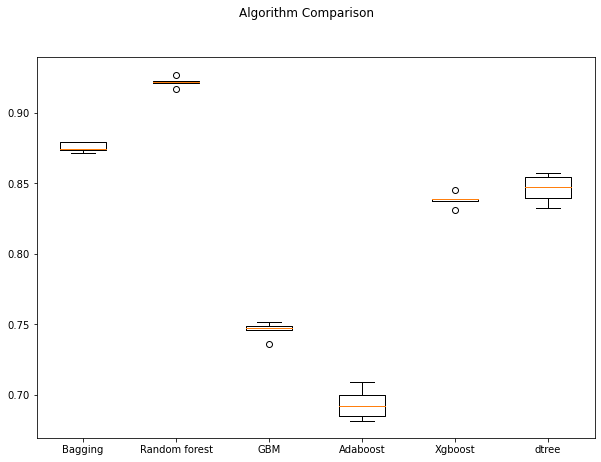

In [41]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- The four best models are Bagging Classifier, Random Forest Classifier, XGBoost Classifier, and Decision Tree model


- These are the models which will have their hyper-parameters tuned in the section below.

## Hyperparameter Tuning

## OverSampling

### Bagging Classifier on OverSampled Data

In [42]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=2)
# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_oversampled, y_train_oversampled)
print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:{'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 70} 
Score: 0.9360690150389713
Wall time: 5min 21s


### Fit Oversampled Bagging Classifier on training data

In [43]:
# Get the best estimator from the grid search
bagging_model_oversampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
bagging_model_oversampled.fit(x_train_oversampled, y_train_oversampled)

bagging_oversampled_grid_train = model_performance_classification_sklearn(
 bagging_model_oversampled, x_train_oversampled, y_train_oversampled
)
print("Training performance:")
bagging_oversampled_grid_train


Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


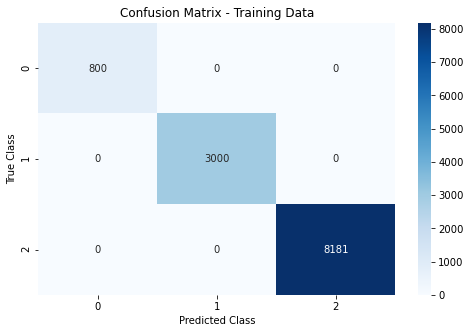

In [44]:
model_confusion_matrix(bagging_model_oversampled,x_train_oversampled,y_train_oversampled)

### Check Performance of Oversampled Bagging Classifier on validation data

In [45]:
bagging_oversampled_grid_train_val = model_performance_classification_sklearn(
 bagging_model_oversampled, x_val, y_val
)
print("Validation performance:")
bagging_oversampled_grid_train_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.828,0.828,0.797,0.773


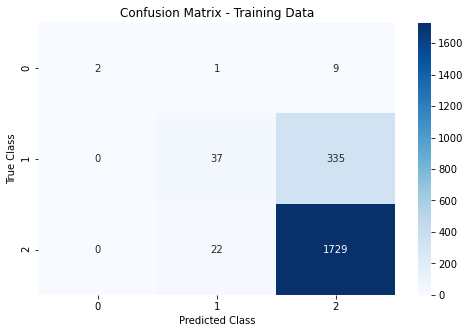

In [46]:
model_confusion_matrix(bagging_model_oversampled,x_val,y_val)

- The model exhibits significant overfitting, as evidenced by a decrease in accuracy between the training and validation datasets.

- A recall score of 83.3% is good.


- The model has a good performance on the validation dataset.

### Random Forest Classifier on OverSampled Data

In [47]:
%%time

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Create a grid search object
grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=3)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_oversampled, y_train_oversampled)


print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 
Score: 0.9399083648662108
Wall time: 2min 57s


### Fit Oversampled Random Forest Classifier on training data and evaluate performance

In [48]:
# Get the best estimator from the grid search
random_forest_oversampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
random_forest_oversampled.fit(x_train_oversampled, y_train_oversampled)

random_forest_oversampled_grid_train = model_performance_classification_sklearn(
 random_forest_oversampled, x_train_oversampled, y_train_oversampled
)
print("Training performance:")
random_forest_oversampled_grid_train


Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


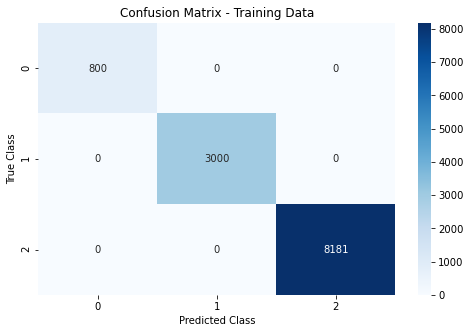

In [49]:
model_confusion_matrix(random_forest_oversampled,x_train_oversampled,y_train_oversampled)

### Check performance on validation data 

In [50]:
random_forest_oversampled_grid_val = model_performance_classification_sklearn(
 random_forest_oversampled, x_val, y_val
)
print("Validation performance:")
random_forest_oversampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.829,0.829,0.831,0.762


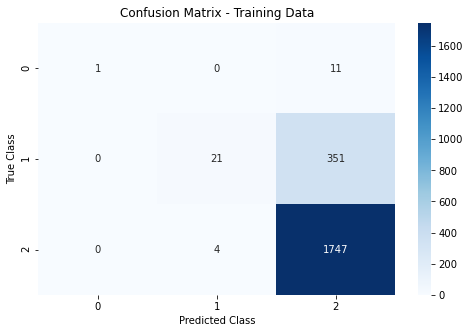

In [51]:
model_confusion_matrix(random_forest_oversampled,x_val,y_val)

- The model exhibits overfitting, as evidenced by a decrease in accuracy between the training and validation datasets.


- The model does however perform well on the validation dataset.

### XGBoost Classifier on Oversampled Data

In [52]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [100, 150, 200],
            'learning_rate': [0.01,0.1],
            'gamma': [0,0.1,0.5], 
            'subsample': [0.5,0.8] }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Create a grid search object
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring=scorer, n_jobs=-1, verbose=1)


# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_oversampled, y_train_oversampled)


print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best Parameters:{'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.5} 
Score: 0.8541037744260015
Wall time: 22min 8s


### Fit Oversampled XGBoost Classifier on training data and evaluate performance

In [53]:
# Get the best estimator from the grid search
xgboost_oversampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
xgboost_oversampled.fit(x_train_oversampled, y_train_oversampled)

xgboost_oversampled_grid_train = model_performance_classification_sklearn(
 xgboost_oversampled, x_train_oversampled, y_train_oversampled
)
print("Training performance:")
xgboost_oversampled_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.924,0.924,0.928,0.920


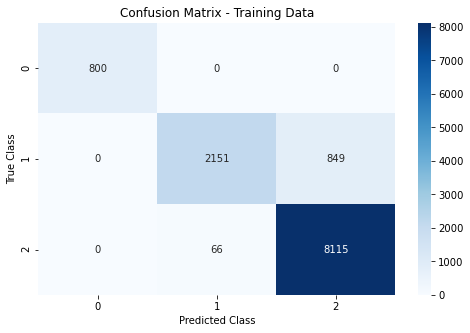

In [54]:
model_confusion_matrix(xgboost_oversampled,x_train_oversampled,y_train_oversampled)

### Check performance on validation data 

In [55]:
xgboost_oversampled_grid_val = model_performance_classification_sklearn(
 xgboost_oversampled, x_val, y_val
)
print("Validation performance:")
xgboost_oversampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.819,0.819,0.779,0.785


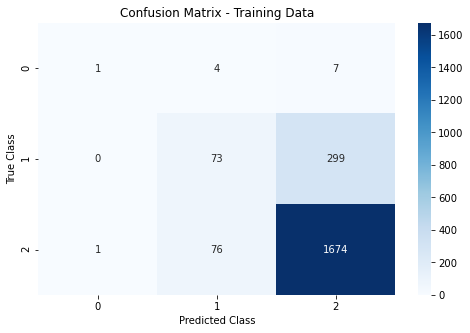

In [56]:
model_confusion_matrix(xgboost_oversampled,x_val,y_val)

- The model exhibits overfitting, as evidenced by a substantial decrease in accuracy between the training and validation datasets.

- The model has a good performance on the validation dataset.

### Decision Tree Classifier on Oversampled Data

In [57]:
%%time


dt_model = DecisionTreeClassifier()

#set up parameter grid
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2', None],
'class_weight': [None, 'balanced']
}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Create a grid search object
grid_cv = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_oversampled, y_train_oversampled)

print(
"Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5} 
Score: 0.713630700033361
Wall time: 31.6 s


### Fit Oversampled Decision Tree Classifier on training data and evaluate performance

In [58]:
# Get the best estimator from the grid search
d_tree_oversampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
d_tree_oversampled.fit(x_train_oversampled, y_train_oversampled)

d_tree_oversampled_grid_train = model_performance_classification_sklearn(
 d_tree_oversampled, x_train_oversampled, y_train_oversampled
)
print("Training performance:")
d_tree_oversampled_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.730,0.730,0.719,0.668


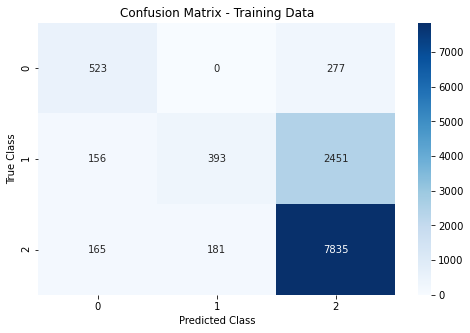

In [59]:
model_confusion_matrix(d_tree_oversampled,x_train_oversampled,y_train_oversampled)

### Check performance on validation data 

In [60]:
d_tree_oversampled_grid_val = model_performance_classification_sklearn(
 d_tree_oversampled, x_val, y_val
)
print("Validation performance:")
d_tree_oversampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.787,0.787,0.728,0.744


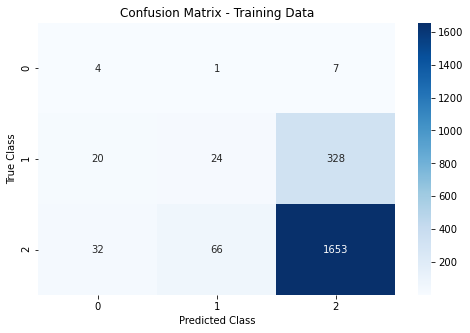

In [61]:
model_confusion_matrix(d_tree_oversampled,x_val,y_val)

- The model has a good performance on the validation dataset and generalizes well.

## UnderSampling

### Bagging Classifier on UnderSampled Data

In [62]:
%%time

# defining model
model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=-1, verbose=1)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_undersampled, y_train_undersampled)


print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:{'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 50} 
Score: 0.6378454070201643
Wall time: 5.16 s


### Fit Undersampled Bagging Classifier on training data

In [63]:
# Get the best estimator from the grid search
bagging_model_undersampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
bagging_model_undersampled.fit(x_train_undersampled, y_train_undersampled)

bagging_undersampled_grid_train = model_performance_classification_sklearn(
 bagging_model_undersampled, x_train_undersampled, y_train_undersampled
)
print("Training performance:")
bagging_undersampled_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996,0.996,0.996,0.996


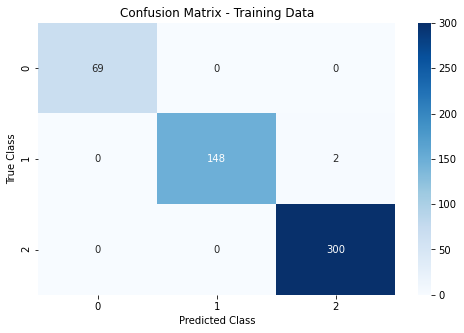

In [64]:
model_confusion_matrix(bagging_model_undersampled,x_train_undersampled,y_train_undersampled)

### Check Performance of Undersampled Bagging Classifier on validation data

In [65]:
bagging_undersampled_grid_train_val = model_performance_classification_sklearn(
 bagging_model_undersampled, x_val, y_val
)
print("Validation performance:")
bagging_undersampled_grid_train_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.740,0.740,0.750,0.744


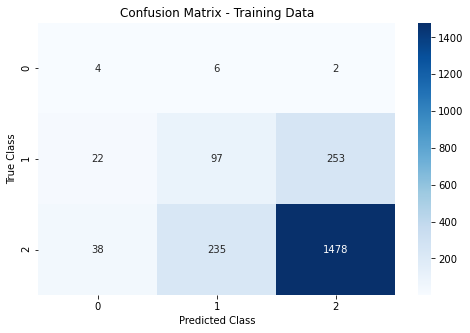

In [66]:
model_confusion_matrix(bagging_model_undersampled,x_val,y_val)

- The model exhibits overfitting, as evidenced by a decrease in accuracy between the training and validation datasets.

- The model does not relatively generalise well on the validation dataset.

### Random Forest Classifier on UnderSampled Data

In [67]:
%%time

# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a random forest classifier object
rfc = RandomForestClassifier()

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Create a grid search object
grid_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_undersampled, y_train_undersampled)


print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 
Score: 0.6320948469006722
Wall time: 14 s


### Fit Undersampled Random Forest Classifier on training data and evaluate performance

In [68]:
# Get the best estimator from the grid search
random_forest_undersampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
random_forest_undersampled.fit(x_train_undersampled, y_train_undersampled)

random_forest_undersampled_grid_train = model_performance_classification_sklearn(
 random_forest_undersampled, x_train_undersampled, y_train_undersampled
)
print("Training performance:")
random_forest_undersampled_grid_train


Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


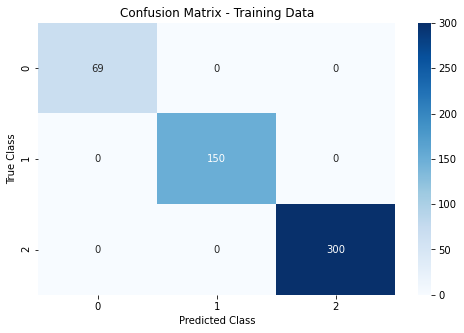

In [69]:
model_confusion_matrix(random_forest_undersampled,x_train_undersampled,y_train_undersampled)

### Check performance on validation data

In [70]:
random_forest_undersampled_grid_val = model_performance_classification_sklearn(
 random_forest_undersampled, x_val, y_val
)
print("Validation performance:")
random_forest_undersampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.787,0.787,0.743,0.758


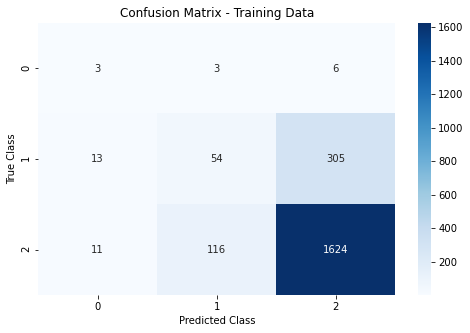

In [71]:
model_confusion_matrix(random_forest_undersampled,x_val,y_val)

- The model exhibits overfitting, as evidenced by a decrease in accuracy between the training and validation datasets.

- The model does not relatively generalise well on the validation dataset.

### XGBoost Classifier on Undersampled Data

In [72]:
%%time

# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [100, 150, 200],
            'learning_rate': [0.01,0.1],
            'gamma': [0,0.1,0.5], 
            'subsample': [0.5,0.8] }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Create a grid search object
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv=4, scoring=scorer, n_jobs=-1, verbose=1)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_undersampled, y_train_undersampled)

print(
 "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)


Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best Parameters:{'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 200, 'subsample': 0.5} 
Score: 0.6012522361359571
Wall time: 1min 8s


### Fit Undersampled XGBoost Classifier on training data and evaluate performance

In [73]:
# Get the best estimator from the grid search
xgboost_undersampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
xgboost_undersampled.fit(x_train_undersampled, y_train_undersampled)

xgboost_undersampled_grid_train = model_performance_classification_sklearn(
 xgboost_undersampled, x_train_undersampled, y_train_undersampled
)
print("Training performance:")
xgboost_undersampled_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.879,0.879,0.894,0.874


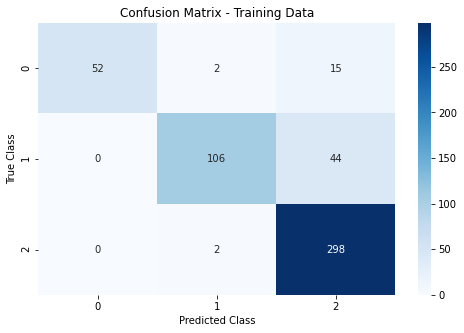

In [74]:
model_confusion_matrix(xgboost_undersampled,x_train_undersampled,y_train_undersampled)

### Check performance on validation data 

In [75]:
xgboost_undersampled_grid_val = model_performance_classification_sklearn(
 xgboost_undersampled, x_val, y_val
)
print("Validation performance:")
xgboost_undersampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.759,0.759,0.742,0.749


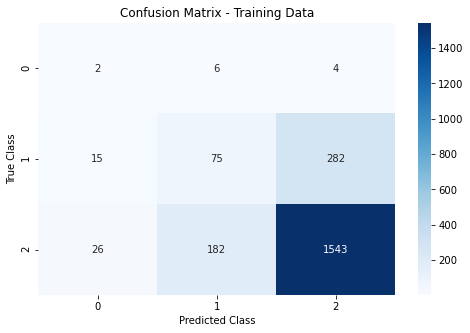

In [76]:
model_confusion_matrix(xgboost_undersampled,x_val,y_val)

- The model exhibits overfitting, as evidenced by a decrease in accuracy between the training and validation datasets.

- The model does not relatively generalise well on the validation dataset.

### Decision Tree Classifier on Undersampled Data

In [77]:
%%time


dt_model = DecisionTreeClassifier()

#set up parameter grid
param_grid = {
'criterion': ['gini', 'entropy'],
'max_depth': [3, 5, 7],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': ['sqrt', 'log2', None],
'class_weight': [None, 'balanced']
}


#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Create a grid search object
grid_cv = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)

# Fitting parameters in GridSearchCV
grid_cv.fit(x_train_undersampled, y_train_undersampled)

print(
"Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:{'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 
Score: 0.603211351755041
Wall time: 3.95 s


### Fit Undersampled Decision Tree Classifier on training data and evaluate performance

In [78]:
# Get the best estimator from the grid search
d_tree_undersampled = grid_cv.best_estimator_

# Fit the best estimator to the training data
d_tree_undersampled.fit(x_train_undersampled, y_train_undersampled)

d_tree_undersampled_grid_train = model_performance_classification_sklearn(
 d_tree_undersampled, x_train_undersampled, y_train_undersampled
)
print("Training performance:")
d_tree_undersampled_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.753,0.753,0.803,0.720


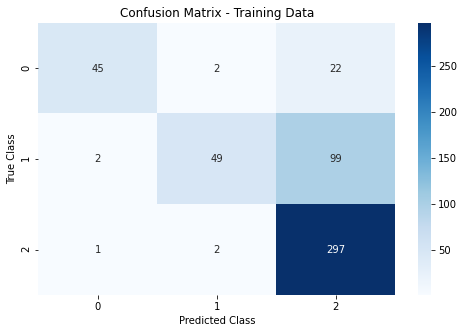

In [79]:
model_confusion_matrix(d_tree_undersampled,x_train_undersampled,y_train_undersampled)

### Check performance on validation data 

In [80]:
d_tree_undersampled_grid_val = model_performance_classification_sklearn(
 d_tree_undersampled, x_val, y_val
)
print("Validation performance:")
d_tree_undersampled_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.760,0.760,0.748,0.749


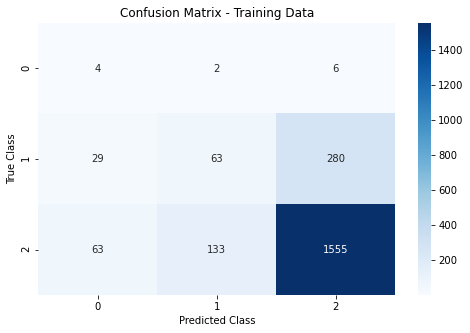

In [81]:
model_confusion_matrix(d_tree_undersampled,x_val,y_val)

- The model performs poorly relative to the other compared models.

## 6. Model Evaluation - Comparing all models

### Training Performance Comparison

In [82]:

models_train_comp_df = pd.concat(
    [
        base_model_train.T,
        bagging_oversampled_grid_train.T,
        bagging_undersampled_grid_train.T,
        random_forest_oversampled_grid_train.T,
        random_forest_undersampled_grid_train.T,
        xgboost_oversampled_grid_train.T,
        xgboost_undersampled_grid_train.T,
        d_tree_oversampled_grid_train.T,
        d_tree_undersampled_grid_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Base Model",
    "Bagging Classifier with OverSampled Data",
    "Bagging Classifier with UnderSampled Data",
    "Random Forest with OverSampled Data",
    "Random Forest with UnderSampled Data",
    "XGBoost with OverSampled Data",
    "XGBoost with UnderSampled Data",
    "Decision Tree with OverSampled Data",
    "Decision Tree with UnderSampled Data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model,Bagging Classifier with OverSampled Data,Bagging Classifier with UnderSampled Data,Random Forest with OverSampled Data,Random Forest with UnderSampled Data,XGBoost with OverSampled Data,XGBoost with UnderSampled Data,Decision Tree with OverSampled Data,Decision Tree with UnderSampled Data
Accuracy,0.683,1.000,0.996,1.000,1.000,0.924,0.879,0.730,0.753
Recall,0.683,1.000,0.996,1.000,1.000,0.924,0.879,0.730,0.753
Precision,0.608,1.000,0.996,1.000,1.000,0.928,0.894,0.719,0.803
F1,0.576,1.000,0.996,1.000,1.000,0.920,0.874,0.668,0.720


### Validation Performance Comparison

In [83]:
models_val_comp_df = pd.concat(
    [
        base_model_val.T,
        bagging_oversampled_grid_train_val.T,
        bagging_undersampled_grid_train_val.T,
        random_forest_oversampled_grid_val.T,
        random_forest_undersampled_grid_val.T,
        xgboost_oversampled_grid_val.T,
        xgboost_undersampled_grid_val.T,
        d_tree_oversampled_grid_val.T,
        d_tree_undersampled_grid_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Base Model",
    "Bagging Classifier with OverSampled Data",
    "Bagging Classifier with UnderSampled Data",
    "Random Forest with OverSampled Data",
    "Random Forest with UnderSampled Data",
    "XGBoost with OverSampled Data",
    "XGBoost with UnderSampled Data",
    "Decision Tree with OverSampled Data",
    "Decision Tree with UnderSampled Data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model,Bagging Classifier with OverSampled Data,Bagging Classifier with UnderSampled Data,Random Forest with OverSampled Data,Random Forest with UnderSampled Data,XGBoost with OverSampled Data,XGBoost with UnderSampled Data,Decision Tree with OverSampled Data,Decision Tree with UnderSampled Data
Accuracy,0.814,0.828,0.740,0.829,0.787,0.819,0.759,0.787,0.760
Recall,0.814,0.828,0.740,0.829,0.787,0.819,0.759,0.787,0.760
Precision,0.737,0.797,0.750,0.831,0.743,0.779,0.742,0.728,0.748
F1,0.748,0.773,0.744,0.762,0.758,0.785,0.749,0.744,0.749


### Best Model Performance

- The best model performance on the training and validation data, came from the XGBoost with OverSampled Data.

- I picked this model over others because it overfits less on the training dataset.

- Further tuning will be carried out to attempt to reduce overfitting.

### Best Model Performance on the test set

In [84]:
best_model_performance = model_performance_classification_sklearn(
 xgboost_oversampled, x_tests, y_tests
)
print("Test performance:")
best_model_performance

Test performance:


,Accuracy,Recall,Precision,F1
0,0.810,0.810,0.769,0.773


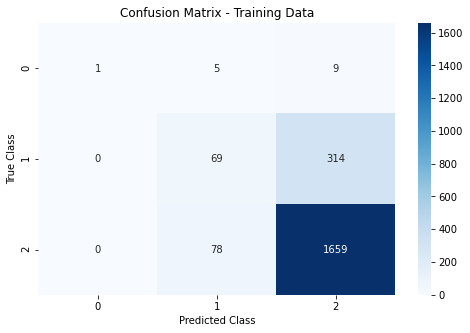

In [85]:
model_confusion_matrix(xgboost_oversampled,x_tests,y_tests)

- The Model performs similarly on the validation and test datasets which means it's performance translates to outside data.

- There is still overfitting going on, this will try to be addressed by further tuning the model.

- Very little predictions are made by the model on the Fatal class.

### Feature Selection with Best Model

- Using the Mean Decrease Impurity (MDI) of the chosen model to get the most important features and building a dataset of the most important features.

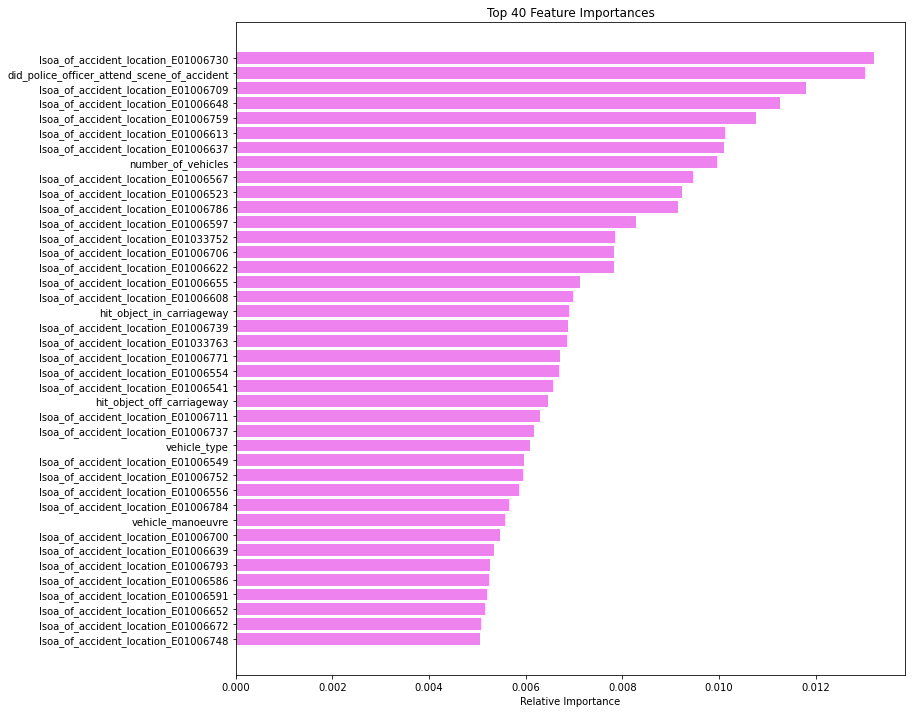

In [86]:
# Get the feature names and their importances
feature_names = x_train_oversampled.columns
importances = xgboost_oversampled.feature_importances_

# Sort the features based on their importances
indices = np.argsort(importances)[::-1]

# Select the top 40 features
top_indices = indices[:40][::-1]  # reverse the order
top_feature_names = [feature_names[i] for i in top_indices][::-1]  # reverse the order
top_importances = importances[top_indices][::-1]  # reverse the order

# Plot the top 40 features in descending order
plt.figure(figsize=(12, 12))
plt.title("Top 40 Feature Importances")
plt.barh(range(len(top_indices)), top_importances[::-1], color="violet", align="center") # reverse the order
plt.yticks(range(len(top_indices)), top_feature_names[::-1]) # reverse the order
plt.xlabel("Relative Importance")
plt.show()



### Top 40 features will be selected and the model will be be tuned using a randomised grid search and rebuilt

In [87]:
# Get the feature names and their importances
feature_names = x_train_oversampled.columns
importances = xgboost_oversampled.feature_importances_

# Sort the features based on their importances
indices = np.argsort(importances)[::-1]

# Select the 40 most important features, excluding "latitude" and "longitude"
selected_feature_indices = [i for i in indices if feature_names[i] not in ["latitude", "longitude"]][:38]

# Add the indices of "latitude" and "longitude" to the selected features
lat_index = feature_names.get_loc("latitude")
long_index = feature_names.get_loc("longitude")
selected_feature_indices += [lat_index, long_index]

# Create a new dataframe with only the selected features, including "latitude" and "longitude"
x_train_best_features_oversampled = x_train_oversampled.iloc[:, selected_feature_indices]


### Building an XG Boost Model using the Best Features and Evaluating the Model

In [88]:
# Fit the best estimator to the training data
b_f_r_f_oversampled = xgboost_oversampled.fit(x_train_best_features_oversampled, y_train_oversampled)

xgboost_oversampled_grid_best_features = model_performance_classification_sklearn(
 b_f_r_f_oversampled, x_train_best_features_oversampled, y_train_oversampled
)
print("Best Features Model - Training performance:")
xgboost_oversampled_grid_best_features

Best Features Model - Training performance:


,Accuracy,Recall,Precision,F1
0,0.883,0.883,0.888,0.874


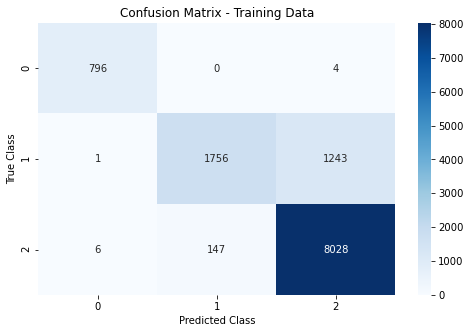

In [89]:
model_confusion_matrix(b_f_r_f_oversampled,x_train_best_features_oversampled,y_train_oversampled)

### On validation data

In [90]:
# Create a new dataframe with only the selected features in validation data

x_val_best_features = x_val.iloc[:, selected_feature_indices]

In [91]:
xgb_oversampled_grid_best_features_val = model_performance_classification_sklearn(
 b_f_r_f_oversampled, x_val_best_features, y_val
)
print("Best Features Model - Validation performance:")
xgb_oversampled_grid_best_features_val

Best Features Model - Validation performance:


,Accuracy,Recall,Precision,F1
0,0.806,0.806,0.759,0.773


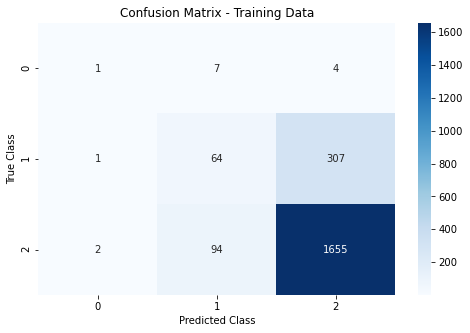

In [92]:
model_confusion_matrix(b_f_r_f_oversampled,x_val_best_features,y_val)

- There is no immediate increase in performance or reduction in overfitting when comparing the model's performance before selecting the best features.

### On test data

In [93]:
# Create a new dataframe with only the selected features in test data

x_test_best_features = x_tests.iloc[:, selected_feature_indices]

In [94]:
best_model_performance_best_features = model_performance_classification_sklearn(
 b_f_r_f_oversampled, x_test_best_features, y_tests
)
print("Best Features Model - Test performance:")
best_model_performance_best_features

Best Features Model - Test performance:


,Accuracy,Recall,Precision,F1
0,0.799,0.799,0.753,0.766


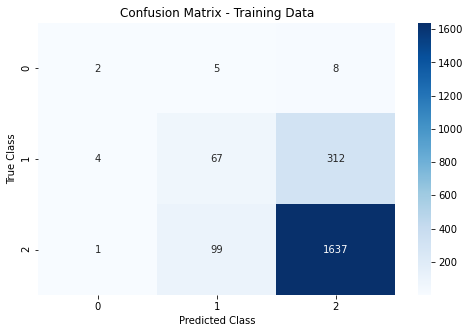

In [95]:
model_confusion_matrix(b_f_r_f_oversampled,x_test_best_features,y_tests)

- The model performs similarly on the validation and test set across all metrics.

- The model performs well on all metrics.

- Most predictions made on the Fatal class are wrong however.

- Overfitting has not been reduced.

### Building an XG Boost Randomised Grid Search with Best Features Dataset to Further Tune the Data and attempt to reduce overfitting

In [96]:
%%time


model = XGBClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [150,200,250,300],
"learning_rate": [0.01,0.05,0.1],
"subsample": [0.5, 0.7, 1],
"max_depth": [3, 4, 5],
"colsample_bytree": [0.3, 0.6, 0.9]}

#Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100,
n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=3)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(x_train_best_features_oversampled,y_train_oversampled)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,
randomized_cv.best_score_))

xgb_randomized_grid_search = randomized_cv.best_params_

xgb_randomized_grid_search = randomized_cv.best_estimator_





Fitting 5 folds for each of 100 candidates, totalling 500 fits
[01:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters are {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9} with CV score=0.824973829975282:
Wall time: 10min 28s


### Performance on Training Data

In [97]:
# Get the best estimator from the grid search
xgb_randomized = randomized_cv.best_estimator_

# Fit the best estimator to the training data
xgb_randomized.fit(x_train_best_features_oversampled, y_train_oversampled)

xgb_oversampled_random_grid_train = model_performance_classification_sklearn(
 xgb_randomized, x_train_best_features_oversampled, y_train_oversampled
)
print("Randomized XGBoost - Training performance:")
xgb_oversampled_random_grid_train

[01:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Randomized XGBoost - Training performance:


,Accuracy,Recall,Precision,F1
0,0.877,0.877,0.881,0.866


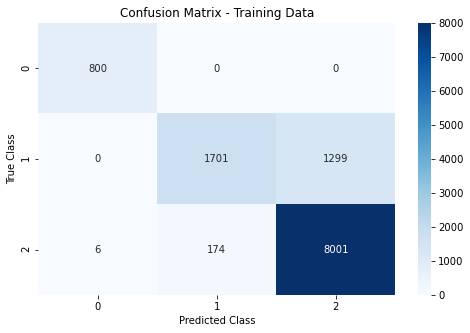

In [98]:
model_confusion_matrix(xgb_randomized,x_train_best_features_oversampled,y_train_oversampled)

### Performance on Validation Data

In [99]:
xg_oversampled_random_grid_val = model_performance_classification_sklearn(
 xgb_randomized, x_val_best_features, y_val
)
print("Randomized XGBoost - Validation performance:")
xg_oversampled_random_grid_val

Randomized XGBoost - Validation performance:


,Accuracy,Recall,Precision,F1
0,0.808,0.808,0.765,0.776


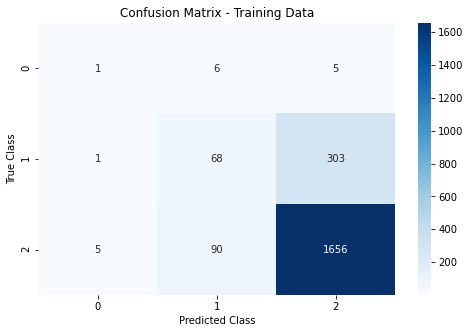

In [100]:
model_confusion_matrix(xgb_randomized,x_val_best_features,y_val)

- There is a reduction in overfitting, and the model generalizes better.

### Comparing the previously chosen model with the Best Features XGBoost Model, and the Randomized Grid Search XGBoost Model

### Training Performance

In [101]:
models_train_comp2_df = pd.concat(
    [
        xgboost_oversampled_grid_train.T,
        xgboost_oversampled_grid_best_features.T,
        xgb_oversampled_random_grid_train.T    
    ],
    axis=1,
)
models_train_comp2_df.columns = [
    "XGBoost Grid Search OverSampled",
    "XGBoost Best Features",
    "XGBoost Randomized Grid Search - Best Features",
]
print("Training performance comparison:")
models_train_comp2_df

Training performance comparison:


,XGBoost Grid Search OverSampled,XGBoost Best Features,XGBoost Randomized Grid Search - Best Features
Accuracy,0.924,0.883,0.877
Recall,0.924,0.883,0.877
Precision,0.928,0.888,0.881
F1,0.920,0.874,0.866


### Validation Performance

In [102]:
models_val_comp2_df = pd.concat(
    [
        xgboost_oversampled_grid_val.T,
        xgb_oversampled_grid_best_features_val.T,
        xg_oversampled_random_grid_val.T      
    ],
    axis=1,
)
models_val_comp2_df.columns = [
    "XGBoost Grid Search OverSampled",
    "XGBoost Best Features",
    "XGBoost Randomized Grid Search - Best Features",
]

print("Validation performance comparison:")
models_val_comp2_df

Validation performance comparison:


,XGBoost Grid Search OverSampled,XGBoost Best Features,XGBoost Randomized Grid Search - Best Features
Accuracy,0.819,0.806,0.808
Recall,0.819,0.806,0.808
Precision,0.779,0.759,0.765
F1,0.785,0.773,0.776


### Picking Final Model

- The XGBoost Model using a Randomized Grid Search is selected since overfitting has been reduced while the performnace on the validation dataset remains good.

### Final Model Evaluation on Test Set

In [103]:
best_model_performance_best_features_randomized = model_performance_classification_sklearn(
 xgb_randomized, x_test_best_features, y_tests
)
print("Best Features Model - Test performance:")
best_model_performance_best_features_randomized

Best Features Model - Test performance:


,Accuracy,Recall,Precision,F1
0,0.799,0.799,0.753,0.766


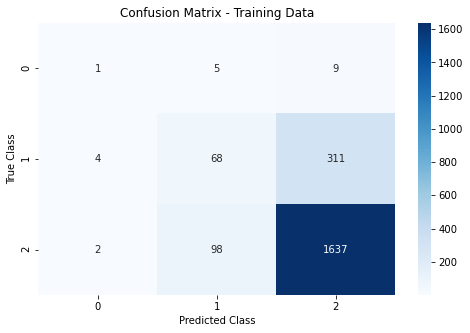

In [104]:
model_confusion_matrix(xgb_randomized,x_test_best_features,y_tests)

- The model performs similarly on both the validation and test sets, it indicates that the model has learned to generalize well.


- Overfitting has been reduced by tuning hyperparameters.


- Again, low predictions are made on the Fatal class.


- However, we need to refine the model and fine-tune its parameters, and achieve even better performance and greater accuracy in predicting outcomes.

### Selecting the 20 Most Hazardous Zones based on the model

In [105]:
features = x_train_best_features_oversampled.columns

In [106]:
zone_probabilities = xgb_randomized.predict_proba(x_train_best_features_oversampled[features])
zone_probabilities_df = pd.DataFrame(zone_probabilities, columns=['Slight', 'Serious', 'Fatal'])
zone_probabilities_df['latitude'] = x_train_best_features_oversampled['latitude']
zone_probabilities_df['longitude'] = x_train_best_features_oversampled['longitude']
most_accident_prone_zones = zone_probabilities_df.groupby(['latitude', 'longitude'])['Fatal'].mean().sort_values(ascending=False).head(20).reset_index()
print(most_accident_prone_zones)


    latitude  longitude  Fatal
0      1.813      8.047  0.996
1      2.067      0.039  0.993
2     -2.203      2.415  0.993
3     -2.443      2.068  0.993
4     -1.404      0.083  0.991
5     -1.826      1.039  0.991
6     -0.366     -1.350  0.990
7     -0.384      1.176  0.990
8     -2.434      2.780  0.990
9     -2.437      2.063  0.990
10    -2.116      1.481  0.990
11    -1.343      1.510  0.990
12    -2.211      2.419  0.990
13    -0.715      2.139  0.989
14    -0.680     -1.354  0.989
15    -0.063     -0.375  0.989
16    -1.492      0.230  0.989
17     1.862      1.031  0.989
18    -0.334     -1.377  0.988
19    -2.124      1.874  0.987


- The Latitude and Longitude give specific locations the government should pay the most attention to to reduce accidents in that region.

### 8. Recommendations to City Authorities and Stakeholders

- The locations selected by the model with latitude and longitude co-ordinates should be given priority attention by the government and more resources and accident mitigation measures should be deployed there to reduce accident occurence and severity. 


- More police officers should be made available in these locations.


- Certain vehicle manoeuvre's should be penalized and heavily fined to discourage drivers from attempting them.


- Drivers should be advised to avoid driving at certain times of the day.


- Either by strengthing efforts to make public transport more accessible or otherinitiatives, concerted effort should be made to reduce the average number of vehicles on roads.

### 9. Conclusion: key findings, possible future improvements. 

### KEY FINDINGS

- 'did_police_officer_attend_scene_of_accident', 'number_of_vehicles' ,'vehicle_manoeuvre', and 'light_conditions' are the independent variables most correlated with the accident_severity variable.


- Most of the variables have weak correlations with the accident_severity variable.


- The best model is the Random Forest Model with parameters gotten after the Randomized Grid Search.


- There is overfitting on the data which was reduced after tuning hyperparameters. The model should be further tuned to improve its performance.


- The chosen model performs with an accuracy of 79.7% precision of 74.4% recall of 79.7% and F1 score of 75.8% on the test data.



- The precision value shows the model can be reasonably trusted.





### POSSIBLE FUTURE IMPROVEMENTS

- Increase the size of the dataset: The size of the dataset used to train the model isn't large enough. Gathering more data and adding it to the existing dataset can help improve the accuracy and precision of the model. The instances of Fatal classes was too low, which affected model perfromance and predictions made on the class.


- Feature engineering: Create or gather new features to better represent the problem at hand. There is low correlation between most of the dependent and independent variables in the dataset and this can be fixed by getting better features. This could involve removing irrelevant features or combining related ones to create more informative features that can improve the accuracy and precision of the model.


- Try more predictive algorithms: In this project, only 6 models were fit to the data. By experimenting with different algorithms and different kinds of algorithms it's possible to increase the accuracy and precision of the model.


- Tune hyperparameters: Experiment with more hyperparameters of the model, and try to optimize them to improve the performance of your model. A more extensive grid search or random search can be implemented to find the best combination of hyperparameters for the model.

### Challenges with Real World Implementation

- It may be difficult to integrate the predictive model with existing systems used by emergency responders or transportation agencies, requiring significant changes to how things are currently done.



- The model needs to be updated frequently to stay accurate and relevant, which means that new data needs to flow in constantly and there must be a way to update the model efficiently.



- The accuracy of the model heavily depends on the quality of the data used to train it, so it's important to ensure that the data is complete, consistent, and unbiased.



- It's crucial to be able to explain the model's predictions in a way that stakeholders can understand, especially if the model is complex.



- The deployment of the model and its predictions may have legal and liability implications, so it's important to have appropriate legal frameworks in place to reduce the risks.

In [107]:
# Finish Timer

"---- The notebook is completed in %s minutes----"%((str(round((time.time() - Start_time)/60,4))))

'---- The notebook is completed in 48.7459 minutes----'